**Importing the libreries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# Import tensorflow and keras
import tensorflow as tf
import keras

# For creating ANN model
from keras.layers import Dense, Dropout
from keras.models import Sequential

# For splitting 
from sklearn.model_selection import train_test_split

# For scaling and encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler

# For selecting the best features
from sklearn.feature_selection import SelectKBest, f_regression

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data (3).csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))

In [4]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Encoding the categorical columns.**

In [7]:
df[['id', 'date', 'price', 'zipcode', 'lat', 'long', 'bathrooms', 'floors']] = df[['id', 'date', 'price', 'zipcode', 'lat', 'long', 'bathrooms', 'floors']].apply(LabelEncoder().fit_transform)

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15339,164,349,3,3,1180,5650,0,0,0,3,7,1180,0,1955,0,66,2398,223,1340,5650
1,14466,220,2091,3,8,2570,7242,2,0,0,3,7,2170,400,1951,1991,55,4478,161,1690,7639
2,13503,290,180,2,3,770,10000,0,0,0,3,6,770,0,1933,0,16,4647,247,2720,8062
3,6371,220,2373,4,11,1960,5000,0,0,0,5,7,1050,910,1965,0,58,2492,87,1360,5000
4,4955,283,1967,3,7,1680,8080,0,0,0,3,8,1680,0,1987,0,37,3439,435,1800,7503


**Data visualization.**

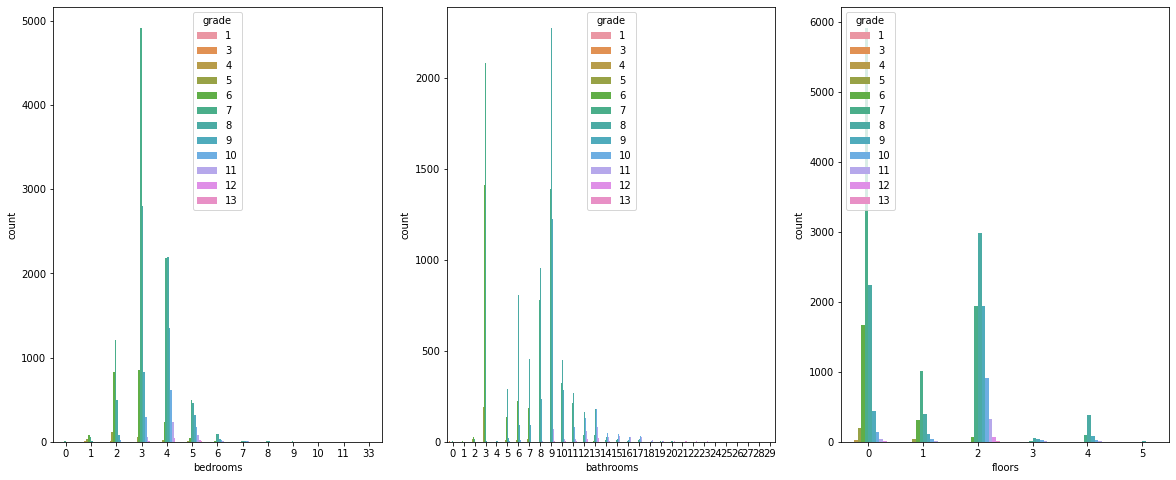

In [21]:
_, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.countplot(x = "bedrooms", hue="grade", data = df, ax= ax[0])
sns.countplot(x = "bathrooms", hue="grade", data = df, ax = ax[1])
sns.countplot(x = "floors", hue="grade", data = df, ax = ax[2])

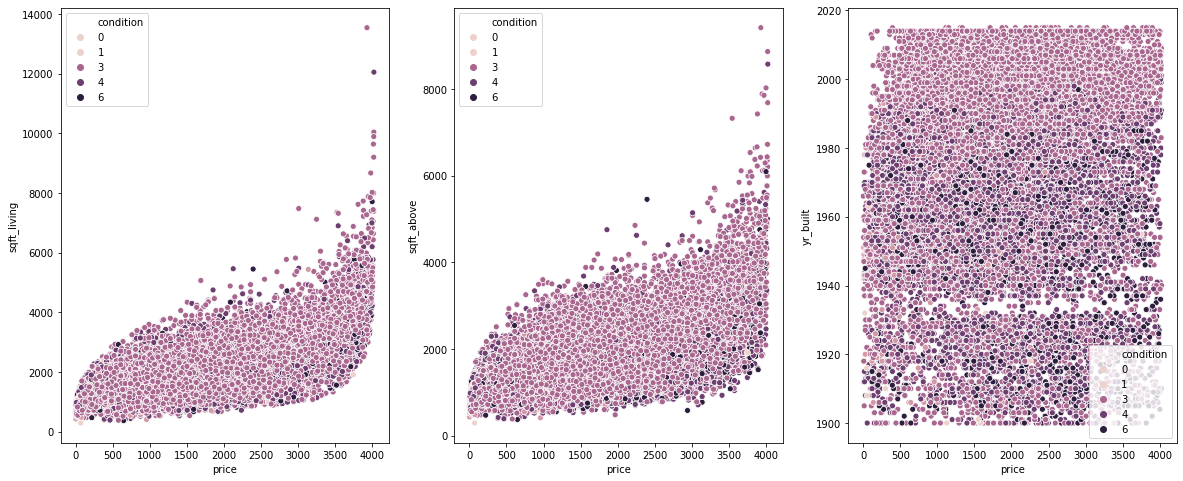

In [25]:
_, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.scatterplot(x = "price", y = "sqft_living", data = df, hue="condition", ax = ax[0])
sns.scatterplot(x = "price", y = "sqft_above", data = df, hue="condition", ax = ax[1])
sns.scatterplot(x = "price", y = "yr_built", data = df, hue="condition", ax = ax[2])

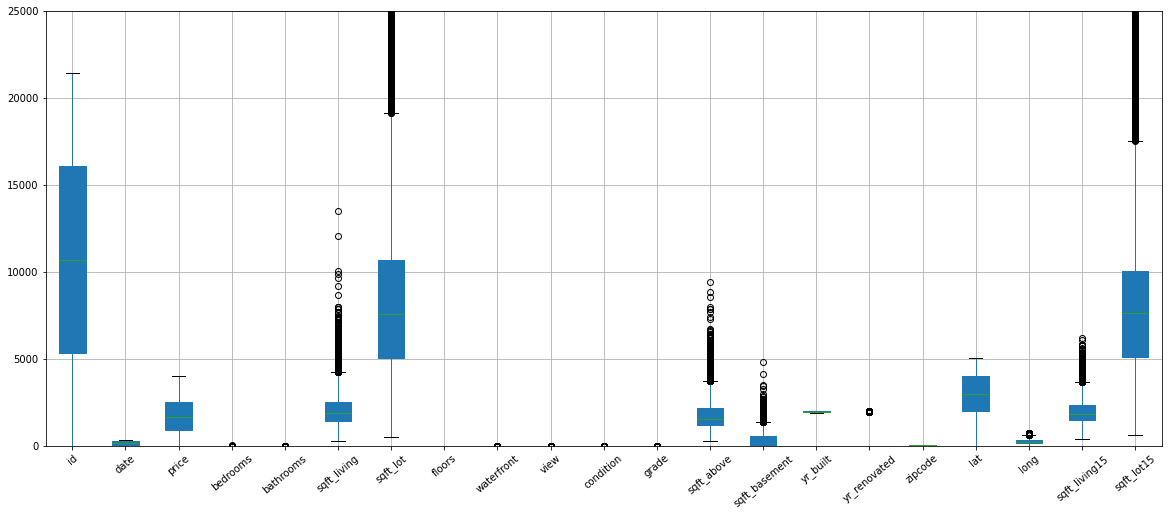

In [9]:
plt.figure(figsize=(20,8))
bplot = df.boxplot(patch_artist=True)
plt.xticks(rotation=40)       
plt.ylim(0,25000)
plt.show()

In [10]:
df.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005474,-0.001532,0.002111,0.003843,-0.013209,-0.136543,0.015836,-0.003570,0.012517,-0.021692,0.007762,-0.013249,-0.002623,0.019345,-0.017579,-0.006489,-0.002331,0.015335,-0.003862,-0.143568
date,0.005474,1.000000,-0.008417,-0.016964,-0.034404,-0.034570,0.006361,-0.022395,0.001544,-0.001837,-0.050755,-0.040040,-0.027890,-0.019554,-0.000471,-0.024401,0.000764,-0.032399,-0.007546,-0.031653,0.002643
price,-0.001532,-0.008417,1.000000,0.336372,0.527371,0.669684,0.101969,0.307581,0.136044,0.321629,0.038343,0.687315,0.582693,0.299479,0.068296,0.110355,-0.018128,0.461054,0.061062,0.611768,0.093335
bedrooms,0.002111,-0.016964,0.336372,1.000000,0.515558,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152008,-0.009972,0.134239,0.391638,0.029244
bathrooms,0.003843,-0.034404,0.527371,0.515558,1.000000,0.754507,0.087626,0.501149,0.063820,0.187607,-0.125225,0.665266,0.685303,0.283515,0.506626,0.050647,-0.193202,0.023532,0.229485,0.569021,0.087064
sqft_living,-0.013209,-0.034570,0.669684,0.576671,0.754507,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.192005,0.050885,0.246542,0.756420,0.183286
sqft_lot,-0.136543,0.006361,0.101969,0.031703,0.087626,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.125899,-0.081142,0.232594,0.144608,0.718557
floors,0.015836,-0.022395,0.307581,0.175429,0.501149,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.038788,0.048755,0.127421,0.279885,-0.011269
waterfront,-0.003570,0.001544,0.136044,-0.006582,0.063820,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.029122,-0.015474,-0.040629,0.086463,0.030703
view,0.012517,-0.001837,0.321629,0.079532,0.187607,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.071363,0.006410,-0.078997,0.280439,0.072575


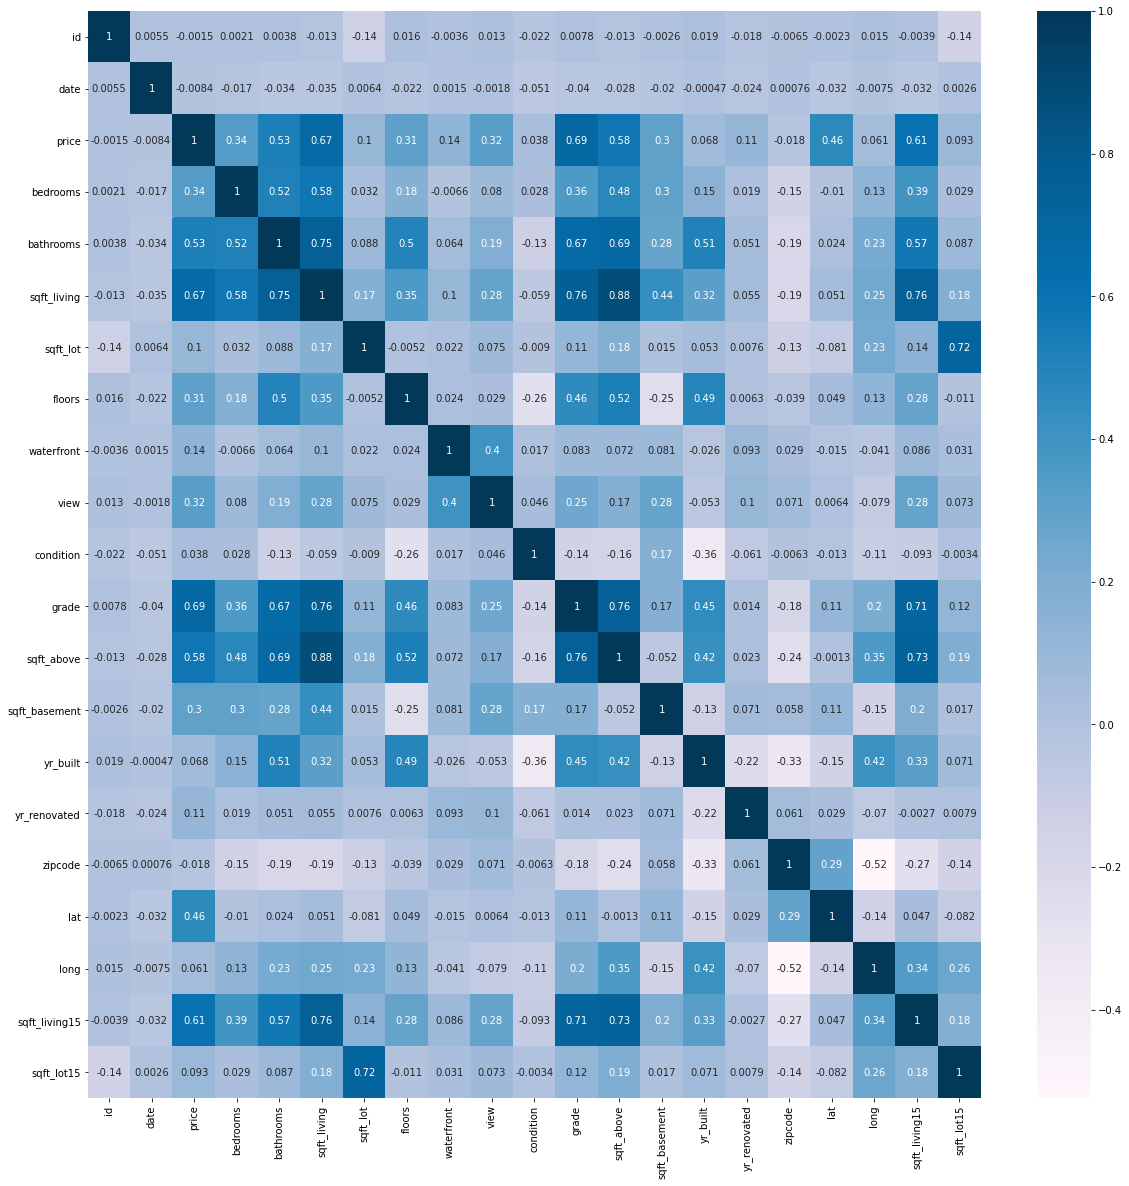

In [18]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = 'PuBu')

In [13]:
df.corr().loc[:, 'price'].abs().sort_values(ascending = False)

price            1.000000
grade            0.687315
sqft_living      0.669684
sqft_living15    0.611768
sqft_above       0.582693
bathrooms        0.527371
lat              0.461054
bedrooms         0.336372
view             0.321629
floors           0.307581
sqft_basement    0.299479
waterfront       0.136044
yr_renovated     0.110355
sqft_lot         0.101969
sqft_lot15       0.093335
yr_built         0.068296
long             0.061062
condition        0.038343
zipcode          0.018128
date             0.008417
id               0.001532
Name: price, dtype: float64

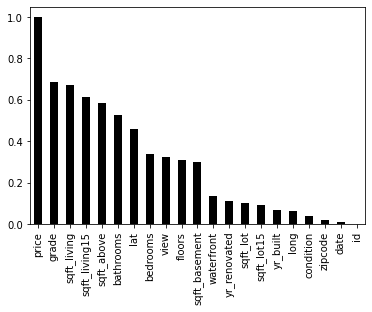

In [14]:
df.corr().loc[:, 'price'].abs().sort_values(ascending = False).plot.bar(color = 'black')

**Dividing the above dataset into X and y.**

In [27]:
y = np.array(df['price'])
y = y.reshape(-1,1)

In [28]:
X = df.iloc[:, df.columns != 'price']

**To select important features.**

In [30]:
fs = SelectKBest(score_func=f_regression, k=15)
X_selected = fs.fit_transform(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
X_selected.shape

(21613, 15)

In [95]:
X_selected

array([[   3,    3, 1180, ..., 2398, 1340, 5650],
       [   3,    8, 2570, ..., 4478, 1690, 7639],
       [   2,    3,  770, ..., 4647, 2720, 8062],
       ...,
       [   2,    2, 1020, ..., 3223, 1020, 2007],
       [   3,    9, 1600, ..., 2629, 1410, 1287],
       [   2,    2, 1020, ..., 3220, 1020, 1357]])

**Splitting of the dataset.**

In [33]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_selected, y, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42) 

In [35]:
X_train_full.shape

(16209, 15)

**Standardizing of the dataset.**

In [36]:
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [38]:
np.random.seed(42)
tf.random.set_seed(42)

**Creation of ANN model.**

In [117]:
model = Sequential()

model.add(Dense(32, activation = 'relu', input_shape = (15, ), name = 'Input'))
model.add(Dense(64, activation = 'relu', name = 'Dense_1'))
model.add(Dense(128, activation = 'relu', name = 'Dense_2'))
model.add(Dropout(0.25))

model.add(Dense(1, name = 'Output'))

model.compile(loss = 'mean_squared_error',
              optimizer = keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['mae'])

In [118]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 32)                512       
_________________________________________________________________
Dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
Dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
Output (Dense)               (None, 1)                 129       
Total params: 11,073
Trainable params: 11,073
Non-trainable params: 0
_________________________________________________________________


In [120]:
model_history = model.fit(X_train, y_train, epochs = 60, validation_data = (X_valid, y_valid), batch_size = 64)


Train on 12156 samples, validate on 4053 samples
Epoch 1/60
12156/12156 [==============================] - 0s 31us/step - loss: 167369.5622 - mae: 310.4154 - val_loss: 152541.9423 - val_mae: 296.8012
Epoch 2/60
12156/12156 [==============================] - 0s 31us/step - loss: 166457.4713 - mae: 308.7158 - val_loss: 149700.9249 - val_mae: 293.1548
Epoch 3/60
12156/12156 [==============================] - 0s 33us/step - loss: 166017.0873 - mae: 308.1285 - val_loss: 152147.4077 - val_mae: 296.3773
Epoch 4/60
12156/12156 [==============================] - 0s 33us/step - loss: 167383.7452 - mae: 310.9329 - val_loss: 149230.9486 - val_mae: 292.6667
Epoch 5/60
12156/12156 [==============================] - 0s 31us/step - loss: 165267.8599 - mae: 307.4457 - val_loss: 149995.7832 - val_mae: 293.4757
Epoch 6/60
12156/12156 [==============================] - 0s 31us/step - loss: 164986.8213 - mae: 306.8479 - val_loss: 153731.1089 - val_mae: 296.7013
Epoch 7/60
12156/12156 [=====================

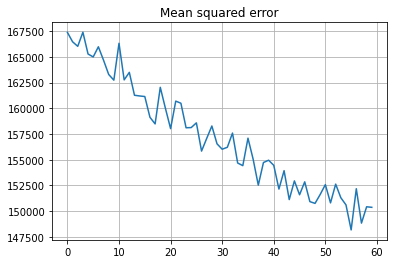

In [121]:
plt.plot(model_history.history['loss'])
plt.title('Mean squared error')
plt.grid(True)

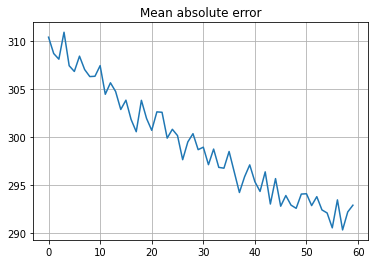

In [122]:
plt.plot(model_history.history['mae'])
plt.title('Mean absolute error')
plt.grid(True)

In [123]:
mae_test = model.evaluate(X_test, y_test)
print("Loss = ",mae_test[0])
print('MAE = ', mae_test[1])

5404/5404 [==============================] - 0s 21us/step
Loss =  142060.15006245373
MAE =  283.1480712890625


In [124]:
X_selected[1]

array([   3,    8, 2570, 7242,    2,    0,    0,    7, 2170,  400, 1951,
       1991, 4478, 1690, 7639])

In [130]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15339,164,349,3,3,1180,5650,0,0,0,3,7,1180,0,1955,0,66,2398,223,1340,5650
1,14466,220,2091,3,8,2570,7242,2,0,0,3,7,2170,400,1951,1991,55,4478,161,1690,7639


In [136]:
X_selected[1]

array([   3,    8, 2570, 7242,    2,    0,    0,    7, 2170,  400, 1951,
       1991, 4478, 1690, 7639])

**Prediction of the below data.**

In [131]:
'''
Bedrooms = 3,
Bathrooms = 8,
sqft_living = 2520,
sqft_lot = 7242,
floors = 2,
waterfront = 0,
view = 0
grade = 7, 
sqft_above = 2170,
sqft_basement = 400, 
yr_built = 1951,
yr_renovated = 1991,
lat = 4478, 
sqft_living15 = 1690,
sqft_lot15 = 7639

'''

'\nBedrooms = 3\nBathrooms = 8\nsqft_living = 2520\nsqft_lot = 7242\nfloors = 2\nwaterfront = 0\nview = 0\ngrade = 7, \nsqft_above = 2170,\nsqft_basement = 400, \nyr_built = 1951,\nyr_renovated = 1991,\nlat = 4478, \nsqft_living15 = 1690,\nsqft_lot15 = 7639\n\n'

In [134]:
model.predict(scaler.transform(np.array([[ 3,8, 2570, 7242,2,0, 0, 7, 2170,  400, 1951,1991, 4478, 1690, 7639]])))

array([[2082.8457]], dtype=float32)

In [135]:
y[1]

array([2091])

In [138]:
y_pred = model.predict(X_test)

In [137]:
y_pred

array([[1121.7748 ],
       [2599.4028 ],
       [3476.7383 ],
       ...,
       [ 725.9128 ],
       [3668.4932 ],
       [1015.26746]], dtype=float32)

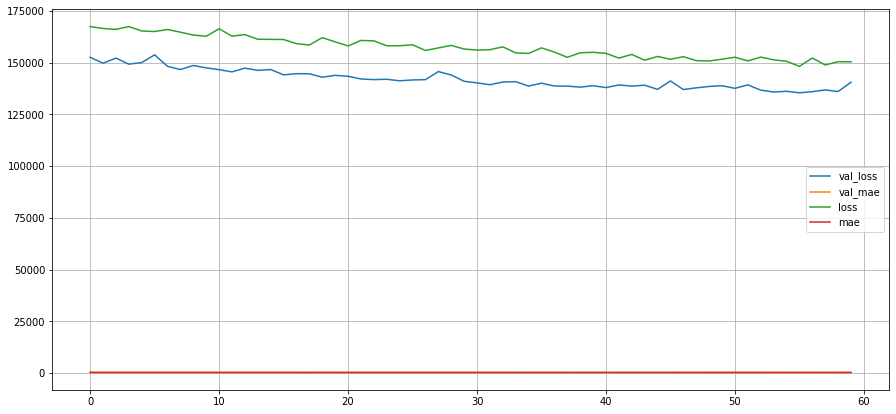

In [128]:
pd.DataFrame(model_history.history).plot(figsize = (15, 7))
plt.gca()
plt.grid(True)
plt.show()